# ปีเตอร์กับหมาป่า: บทเรียนพื้นฐานเกี่ยวกับการเรียนรู้แบบเสริมกำลัง

ในบทเรียนนี้ เราจะเรียนรู้วิธีการนำการเรียนรู้แบบเสริมกำลังมาใช้กับปัญหาการค้นหาเส้นทาง สถานการณ์นี้ได้รับแรงบันดาลใจจากนิทานดนตรีเรื่อง [ปีเตอร์กับหมาป่า](https://en.wikipedia.org/wiki/Peter_and_the_Wolf) โดยนักประพันธ์ชาวรัสเซีย [เซอร์เกย์ โปรโกฟีเยฟ](https://en.wikipedia.org/wiki/Sergei_Prokofiev) เป็นเรื่องราวเกี่ยวกับปีเตอร์ เด็กชายผู้กล้าหาญที่ออกจากบ้านไปยังลานป่าเพื่อไล่ล่าหมาป่า เราจะฝึกอัลกอริทึมการเรียนรู้ของเครื่องที่จะช่วยปีเตอร์สำรวจพื้นที่โดยรอบและสร้างแผนที่นำทางที่เหมาะสมที่สุด

ก่อนอื่น มาเริ่มต้นด้วยการนำเข้าไลบรารีที่มีประโยชน์หลายตัว:


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math

## ภาพรวมของการเรียนรู้แบบเสริมกำลัง

**การเรียนรู้แบบเสริมกำลัง** (Reinforcement Learning หรือ RL) เป็นเทคนิคการเรียนรู้ที่ช่วยให้เราสามารถเรียนรู้พฤติกรรมที่เหมาะสมที่สุดของ **ตัวแทน** (agent) ใน **สภาพแวดล้อม** (environment) โดยการทดลองทำซ้ำหลายๆ ครั้ง ตัวแทนในสภาพแวดล้อมนี้ควรมี **เป้าหมาย** ซึ่งกำหนดโดย **ฟังก์ชันรางวัล** (reward function)

## สภาพแวดล้อม

เพื่อความเข้าใจง่าย ลองพิจารณาโลกของปีเตอร์เป็นกระดานสี่เหลี่ยมขนาด `width` x `height` แต่ละช่องในกระดานนี้สามารถเป็นได้ดังนี้:
* **พื้นดิน** ซึ่งปีเตอร์และสิ่งมีชีวิตอื่นๆ สามารถเดินได้
* **น้ำ** ซึ่งแน่นอนว่าไม่สามารถเดินได้
* **ต้นไม้** หรือ **หญ้า** - สถานที่ที่สามารถพักผ่อนได้
* **แอปเปิล** ซึ่งเป็นสิ่งที่ปีเตอร์จะดีใจที่ได้พบเพื่อใช้เป็นอาหาร
* **หมาป่า** ซึ่งเป็นอันตรายและควรหลีกเลี่ยง

ในการทำงานกับสภาพแวดล้อม เราจะกำหนดคลาสที่เรียกว่า `Board` เพื่อไม่ให้เนื้อหาในสมุดบันทึกนี้ดูรกเกินไป เราได้ย้ายโค้ดทั้งหมดที่เกี่ยวข้องกับการทำงานของกระดานไปยังโมดูล `rlboard` แยกต่างหาก ซึ่งเราจะนำเข้าในตอนนี้ คุณสามารถดูรายละเอียดเพิ่มเติมเกี่ยวกับการทำงานภายในของการนำไปใช้ในโมดูลนี้ได้


ตอนนี้มาสร้างกระดานแบบสุ่มและดูว่ามันเป็นอย่างไร:


In [4]:
# code block 1

## การกระทำและนโยบาย

ในตัวอย่างของเรา เป้าหมายของปีเตอร์คือการหาแอปเปิ้ล ในขณะที่หลีกเลี่ยงหมาป่าและสิ่งกีดขวางอื่น ๆ กำหนดการกระทำเหล่านั้นเป็นพจนานุกรม และจับคู่กับคู่ของการเปลี่ยนแปลงพิกัดที่สอดคล้องกัน


In [5]:
# code block 2

กลยุทธ์ของตัวแทนของเรา (ปีเตอร์) ถูกกำหนดโดยสิ่งที่เรียกว่า **นโยบาย** ลองพิจารณานโยบายที่ง่ายที่สุดที่เรียกว่า **การเดินแบบสุ่ม**

## การเดินแบบสุ่ม

มาแก้ปัญหาของเราด้วยการใช้งานกลยุทธ์การเดินแบบสุ่มกันก่อน


In [ ]:
# Let's run a random walk experiment several times and see the average number of steps taken: code block 3

In [7]:
# code block 4

## ฟังก์ชันรางวัล

เพื่อทำให้กลยุทธ์ของเราฉลาดขึ้น เราจำเป็นต้องเข้าใจว่าการเคลื่อนไหวใด "ดีกว่า" การเคลื่อนไหวอื่นๆ


In [8]:
#code block 5

## Q-Learning

สร้าง Q-Table หรืออาเรย์หลายมิติ เนื่องจากกระดานของเรามีขนาด `width` x `height` เราสามารถแสดง Q-Table ได้ด้วย numpy array ที่มีรูปร่างเป็น `width` x `height` x `len(actions)`


In [9]:
# code block 6

ส่ง Q-Table ไปยังฟังก์ชัน `plot` เพื่อแสดงตารางบนกระดาน:


In [10]:
m.plot(Q)

NameError: name 'm' is not defined

## สาระสำคัญของ Q-Learning: สมการ Bellman และอัลกอริทึมการเรียนรู้

เขียน pseudo-code สำหรับอัลกอริทึมการเรียนรู้ของเรา:

* เริ่มต้น Q-Table Q ด้วยค่าที่เท่ากันสำหรับทุกสถานะและการกระทำ
* กำหนดอัตราการเรียนรู้ $\alpha\leftarrow 1$
* ทำการจำลองซ้ำหลายครั้ง
   1. เริ่มต้นที่ตำแหน่งสุ่ม
   1. ทำซ้ำ
        1. เลือกการกระทำ $a$ ที่สถานะ $s$
        2. ดำเนินการโดยย้ายไปยังสถานะใหม่ $s'$
        3. หากพบเงื่อนไขสิ้นสุดเกม หรือรางวัลรวมมีค่าน้อยเกินไป - ออกจากการจำลอง  
        4. คำนวณรางวัล $r$ ที่สถานะใหม่
        5. อัปเดต Q-Function ตามสมการ Bellman: $Q(s,a)\leftarrow (1-\alpha)Q(s,a)+\alpha(r+\gamma\max_{a'}Q(s',a'))$
        6. $s\leftarrow s'$
        7. อัปเดตรางวัลรวมและลดค่า $\alpha$

## การใช้ประโยชน์ vs. การสำรวจ

วิธีที่ดีที่สุดคือการสร้างสมดุลระหว่างการสำรวจและการใช้ประโยชน์ เมื่อเราเรียนรู้เกี่ยวกับสภาพแวดล้อมมากขึ้น เราจะมีแนวโน้มที่จะเลือกเส้นทางที่เหมาะสมที่สุด แต่ควรเลือกเส้นทางที่ยังไม่ได้สำรวจบ้างเป็นครั้งคราว

## การใช้งาน Python

ตอนนี้เราพร้อมที่จะใช้อัลกอริทึมการเรียนรู้ ก่อนหน้านั้น เราต้องมีฟังก์ชันที่จะแปลงตัวเลขใน Q-Table ให้เป็นเวกเตอร์ของความน่าจะเป็นสำหรับการกระทำที่เกี่ยวข้อง:


In [10]:
# code block 7

เราเพิ่มค่า `eps` เล็กน้อยลงในเวกเตอร์ต้นฉบับเพื่อหลีกเลี่ยงการหารด้วย 0 ในกรณีเริ่มต้น เมื่อทุกองค์ประกอบของเวกเตอร์มีค่าเหมือนกัน

อัลกอริทึมการเรียนรู้ที่เราจะใช้งานจริงจะถูกดำเนินการใน 5000 การทดลอง ซึ่งเรียกว่า **epochs**:


In [56]:

from IPython.display import clear_output

lpath = []

# code block 8

หลังจากดำเนินการอัลกอริทึมนี้ ตาราง Q-Table ควรได้รับการอัปเดตด้วยค่าที่กำหนดความน่าสนใจของการกระทำต่าง ๆ ในแต่ละขั้นตอน แสดงตารางที่นี่:


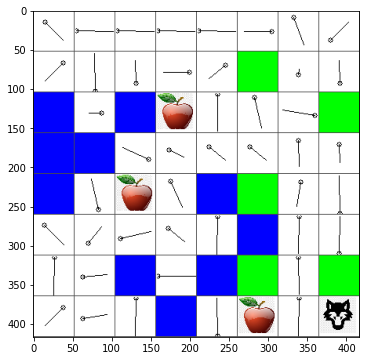

In [43]:
m.plot(Q)

## การตรวจสอบนโยบาย

เนื่องจาก Q-Table แสดง "ความน่าสนใจ" ของแต่ละการกระทำในแต่ละสถานะ การใช้งานมันเพื่อกำหนดการนำทางที่มีประสิทธิภาพในโลกของเราจึงค่อนข้างง่าย ในกรณีที่ง่ายที่สุด เราสามารถเลือกการกระทำที่สอดคล้องกับค่าที่สูงที่สุดใน Q-Table ได้:


In [13]:
# code block 9

2

หากคุณลองรันโค้ดด้านบนหลายครั้ง คุณอาจสังเกตเห็นว่าบางครั้งมันจะ "ค้าง" และคุณจำเป็นต้องกดปุ่ม STOP ในโน้ตบุ๊กเพื่อหยุดการทำงาน

> **งานที่ 1:** แก้ไขฟังก์ชัน `walk` เพื่อจำกัดความยาวสูงสุดของเส้นทางโดยกำหนดจำนวนก้าว (เช่น 100) และสังเกตว่าโค้ดด้านบนจะคืนค่านี้เป็นครั้งคราว

> **งานที่ 2:** แก้ไขฟังก์ชัน `walk` เพื่อไม่ให้กลับไปยังตำแหน่งที่เคยไปมาก่อนหน้านี้ สิ่งนี้จะช่วยป้องกันไม่ให้ `walk` เกิดการวนซ้ำ อย่างไรก็ตาม ตัวแทนอาจยังคงติดอยู่ในตำแหน่งที่ไม่สามารถหลบหนีได้


In [58]:

# code block 10

Average path length = 5.31, eaten by wolf: 0 times


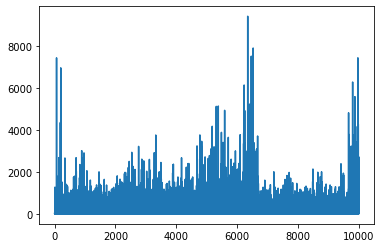

In [57]:
plt.plot(lpath)

## แบบฝึกหัด
## โลกของปีเตอร์กับหมาป่าที่สมจริงยิ่งขึ้น



---

**ข้อจำกัดความรับผิดชอบ**:  
เอกสารนี้ได้รับการแปลโดยใช้บริการแปลภาษา AI [Co-op Translator](https://github.com/Azure/co-op-translator) แม้ว่าเราจะพยายามให้การแปลมีความถูกต้อง แต่โปรดทราบว่าการแปลอัตโนมัติอาจมีข้อผิดพลาดหรือความไม่แม่นยำ เอกสารต้นฉบับในภาษาดั้งเดิมควรถือเป็นแหล่งข้อมูลที่เชื่อถือได้ สำหรับข้อมูลที่สำคัญ แนะนำให้ใช้บริการแปลภาษาจากผู้เชี่ยวชาญ เราไม่รับผิดชอบต่อความเข้าใจผิดหรือการตีความที่ผิดพลาดซึ่งเกิดจากการใช้การแปลนี้
